In [1]:
#GENRATING DRAGONS

import random
from random import randint
#print(randint(0, 9)) results in a number from [0,9]

#DRAGON SECTS
#https://pathfinderwiki.com/wiki/Dragon#Draconic_septs
#metalic dragons=Good brass, copper, bronze, silver, and gold
#chromatic dragons=Evil "white", "black", "green", "blue", "red" 
#Primal dragons=Chaotic brine, cloud, crystal, magma, and umbral
#Outer dragons=Lawful lunar, solar, time, void, vortex

#good
metallic_dragons=["brass", "copper", "bronze", "silver", "gold"]

#evil
chromatic_dragons=["white", "black", "green", "blue", "red"]

#chaotic
primal_dragons=["brine", "cloud", "crystal", "magma", "umbral"]

#lawful
outer_dragons=["lunar", "solar", "time", "void", "vortex"]


#dragons_sects[type][subtype]
dragon_sects =[metallic_dragons,chromatic_dragons,primal_dragons,outer_dragons]

#ALIGNMENTS
law_chaos=["lawful","lawful","neutral","chaotic","chaotic"]
good_evil=["good","good","neutral","evil","evil"]





#return dragon as a string    
def generateDragon():    

    sect_nr=randint(0,len(dragon_sects)-1)
    
    subsect_nr=randint(0,len(dragon_sects[sect_nr])-1)
    
    lawfulness_nr=randint(0,len(law_chaos)-1)   
    
    morality_nr=randint(0,len(good_evil)-1)
    
    return law_chaos[lawfulness_nr]+" "+good_evil[morality_nr]+" "+dragon_sects[sect_nr][subsect_nr]+" dragon"



#returns 0 if dragon alignment is incorrect, 1 if correct 
def generateCorectness(dragonstring):
    
    splitdragon=dragonstring.split()
    
    #print(dragon)
    
    #chaotic evil brass dragon
    if splitdragon[1] == "evil" and splitdragon[2] in metallic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[1] == "good" and splitdragon[2] in chromatic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[0] == "lawful" and splitdragon[2] in primal_dragons:
        #print(0)
        return 0 
    
    elif splitdragon[0] == "chaotic" and splitdragon[2] in outer_dragons:
        #print(0)
        return 0 
    
    else:
        #print(1)
        return 1

   
    


#FUNCTION TO ACTUALLY GENERATE AN ARRAY OF DRAGONS
def generateArrays(size,generated_dragons,correctness):

    for i in range(size):    

        tempdragon=generateDragon()

        tempcorrect=generateCorectness(tempdragon)

        #print(mydragon,tempcorrect)

        generated_dragons+=[tempdragon]
        correctness+=[tempcorrect]

        
#GENERATE A TEST SET
#testing_data=[]
#testing_correctness=[]


#generateArrays(100000,test_data,test_correctness)       
    
#for i in range(len(train_data)):
    #print(train_data[i],train_correctness[i])
print("DONE")


DONE


chaotic good silver dragon 1
lawful good gold dragon 1
chaotic good brass dragon 1
neutral neutral brass dragon 1
lawful evil void dragon 1
lawful good blue dragon 0
chaotic evil umbral dragon 1
neutral neutral copper dragon 1
lawful good umbral dragon 0
neutral good crystal dragon 1
neutral good white dragon 0
lawful evil white dragon 1
lawful evil copper dragon 0
lawful neutral vortex dragon 1
lawful neutral cloud dragon 0
lawful good black dragon 0
chaotic evil white dragon 1
chaotic good cloud dragon 1
neutral evil silver dragon 0
lawful neutral copper dragon 1
chaotic evil magma dragon 1
chaotic good black dragon 0
neutral good time dragon 1
lawful good void dragon 1
neutral neutral magma dragon 1
neutral evil umbral dragon 1
lawful good crystal dragon 0
lawful neutral vortex dragon 1
neutral neutral green dragon 1
neutral good umbral dragon 1
neutral good void dragon 1
lawful good umbral dragon 0
chaotic good blue dragon 0
lawful neutral copper dragon 1
chaotic good brine dragon 

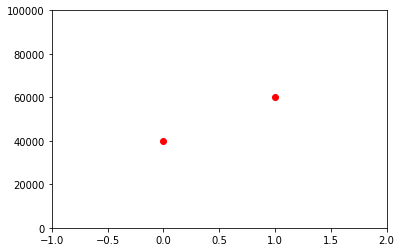

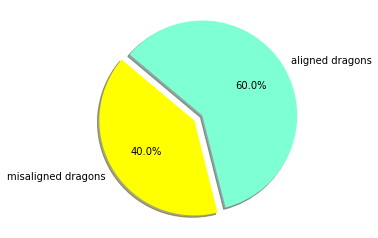

DONE


In [3]:
#GENERATE DATA SETS
import matplotlib.pyplot as plt

train_size=100000
train_data=[]
train_correctness=[]

test_size=100
test_data=[]
test_correctness=[]



generateArrays(train_size,train_data,train_correctness)
generateArrays(test_size,test_data,test_correctness)

#for t in range(train_size):
    #print(train_data[t],train_correctness[t])
#print("DONE")

for t in range(test_size):
    print(test_data[t],test_correctness[t])

print(train_correctness.count(0),train_correctness.count(1))
plt.plot([train_correctness.count(0),train_correctness.count(1)],'ro')
plt.axis([-1,2,0,train_size])
plt.show()


labels = "misaligned dragons","aligned dragons"
sizes = train_correctness.count(0),train_correctness.count(1)
colors = 'yellow','aquamarine'
explode=(0.1,0)
plt.pie(sizes,explode=explode, labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


print("DONE")

    

In [4]:
#IMPORTING STUFF
import tensorflow as ts
import keras as ks
import numpy as np


from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,RMSprop,Adam 
from keras.models import Sequential
from keras.utils import np_utils
print("DONE")

DONE


Using TensorFlow backend.


In [5]:
#MAGIC NUMBERS
nr_neurons_in_first_layer=100
nr_neurons_in_second_layer=10
nr_classes=2
optimizer=Adam()
my_batch_size=100
my_epochs=10
print("done")

done


In [6]:
#FITTIN DATA
#tokenizing strings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tk = Tokenizer()
tk.fit_on_texts(train_data)
index_list = tk.texts_to_sequences(train_data)
train_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)

tk.fit_on_texts(test_data)
index_list = tk.texts_to_sequences(test_data)
test_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)


#one hot encoding
train_correctness=np_utils.to_categorical(train_correctness, nr_classes)

test_correctness=np_utils.to_categorical(test_correctness, nr_classes)



print(train_data)
print(test_correctness)
print("done")

[[ 4  3 12  1]
 [ 4  2 19  1]
 [ 2  5 22  1]
 ...
 [ 4  5 19  1]
 [ 4  3 15  1]
 [ 4  3 26  1]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
don

In [7]:
#BULIDING A MODEL
model=Sequential()
model.add(Dense(nr_neurons_in_first_layer, input_shape=(4,), activation='relu' ))
model.add(Dense(nr_neurons_in_second_layer, activation='relu'))
model.add(Dense(nr_classes, activation='softmax' ))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 1,532
Trainable params: 1,532
Non-trainable params: 0
_________________________________________________________________


In [8]:
#COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print("done")

done


In [9]:
#history = model.fit(x_train, y_train_onehot, batch_size=b_size, epochs=epoch, verbose=1, validation_split=0.2)

history= model.fit(train_data,train_correctness, batch_size=my_batch_size, epochs=my_epochs, verbose=1, validation_split=0.2)
print("done")

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 1s 13us/step - loss: 0.6199 - acc: 0.6526 - val_loss: 0.5837 - val_acc: 0.7014
Epoch 2/10
80000/80000 [==============================] - 1s 10us/step - loss: 0.5728 - acc: 0.7057 - val_loss: 0.5589 - val_acc: 0.7194
Epoch 3/10
80000/80000 [==============================] - 1s 10us/step - loss: 0.5497 - acc: 0.7236 - val_loss: 0.5371 - val_acc: 0.7388
Epoch 4/10
80000/80000 [==============================] - 1s 9us/step - loss: 0.5331 - acc: 0.7314 - val_loss: 0.5221 - val_acc: 0.7314
Epoch 5/10
80000/80000 [==============================] - 1s 10us/step - loss: 0.5166 - acc: 0.7365 - val_loss: 0.5082 - val_acc: 0.7259
Epoch 6/10
80000/80000 [==============================] - 1s 10us/step - loss: 0.5094 - acc: 0.7378 - val_loss: 0.5202 - val_acc: 0.7130
Epoch 7/10
80000/80000 [==============================] - 1s 10us/step - loss: 0.5015 - acc: 0.7391 - val_loss: 0.5100 - val_acc:

In [10]:
score = model.evaluate(test_data,test_correctness)

100/100 [==============================] - 0s 120us/step


In [11]:
print("score: ",score[0])
print("accuracy: ",score[1])

score:  0.5214962673187256
accuracy:  0.74
